In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [37]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [38]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [4]:
X=df.drop('Ground Temperature',axis=1)
Y=df['Ground Temperature']

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [15]:
print('The Linear equation is Ground Temperature={}*Chirps/Second+{}'.format(reg.coef_,reg.intercept_))

The Linear equation is Ground Temperature=[2.70048426]*Chirps/Second+35.04389830508475


In [17]:
Y_pred=LR.predict(X)

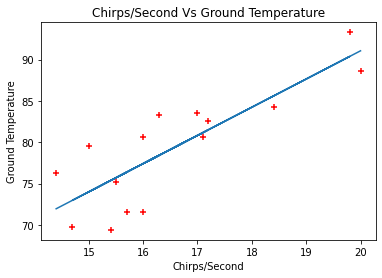

In [18]:
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.title('Chirps/Second Vs Ground Temperature')
plt.scatter(X,Y,marker='+',c='red')
plt.plot(X,Y_pred)
plt.show()

In [20]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg.predict(X_test))
print('The R2_score is',score)

The R2_score is 0.7777053852711475


In [21]:
p=(95-reg.intercept_)/reg.coef_
print('The approximate chirping rate at temperature 95 is',p)

The approximate chirping rate at temperature 95 is [22.20198153]


In [22]:
print('The approximate ground temperature when chirping rate 18 is',reg.predict([[18]]))

The approximate ground temperature when chirping rate 18 is [83.65261501]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [39]:
data=pd.read_fwf("brain_body.txt",dtype=float)
data.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


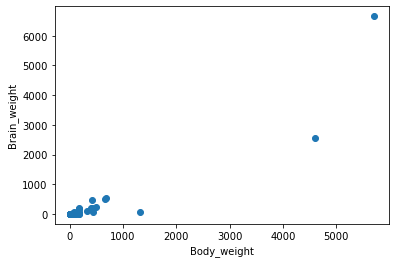

In [40]:
plt.xlabel('Body_weight')
plt.ylabel('Brain_weight')
plt.scatter(data.Body,data.Brain)

In [29]:
threshold=166+1.5*(166-4.25) #values taken from describe to remove outliers
data1=data[data['Body']<threshold]
data1.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
4,36.330,119.5
5,27.660,115.0


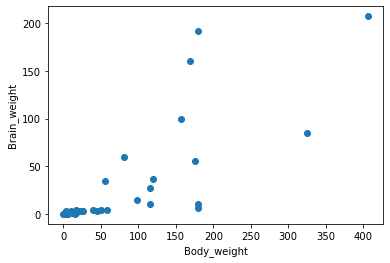

In [30]:
plt.xlabel('Body_weight')
plt.ylabel('Brain_weight')
plt.scatter(data1.Body,data1.Brain)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data1.drop('Brain',axis=1),data1.Brain,test_size=0.3,random_state=102)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [33]:
print('The linear equation is brain_weight={}*Body_weight+{}'.format(reg.coef_,reg.intercept_))

The linear equation is brain_weight=[0.49876084]*Body_weight+-5.0932440430535095


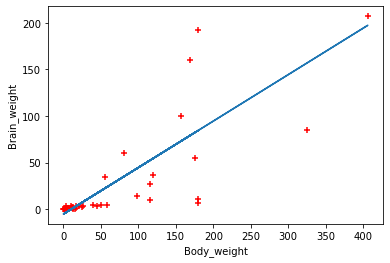

In [34]:
Y_pred=reg.predict(data1.drop('Brain',axis=1))
%matplotlib inline
plt.xlabel("Body_weight")
plt.ylabel("Brain_weight")
plt.scatter(data1.Body,data1.Brain,color='red',marker='+')
plt.plot(data1.drop('Brain',axis=1),Y_pred)

In [35]:
Y_pred1=reg.predict(X_test)
score=r2_score(Y_test,Y_pred1)
print('The r2 score of the model is',score)

The r2 score of the model is 0.8106353601885861


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [46]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [43]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [44]:
df.corr(method='pearson')

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


## From the above correlation table, we can ignore Degree column in predicting salary.Also Sex is negatively 25% correlated with salary So,Sex also is a factor in predicting Salary to some extent.

In [47]:
X=df.iloc[:,:-1]
X.drop('Degree',axis=1,inplace=True)
Y=df.iloc[:,-1]

C:\Users\Jtobss\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [50]:
print(reg.coef_)
print(reg.intercept_)

[ 355.03076294 4210.36111072 2346.13322764 -677.74270429]
24299.024390243903


In [51]:
Y_pred=reg.predict(X_test)

In [53]:
score=r2_score(Y_test,Y_pred)
print('The r2 score of the model is',score)

The r2 score of the model is 0.9737053915251609
